## Get Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../input/train_set.csv')
val_df = pd.read_csv ('../input/val_set.csv')
test_df = pd.read_csv('../input/test_set.csv')

In [3]:
print(f'Train Set Shape: {train_df.shape}')
print(f'Validation Set Shape: {val_df.shape}')
print(f'Test Set Shape: {test_df.shape}')

Train Set Shape: (6000, 7)
Validation Set Shape: (1000, 7)
Test Set Shape: (1000, 7)


## Prepare Data

### Tokenize and Create Padded Sequences

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Specify Size of Vocabulary
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size)  
tokenizer.fit_on_texts(train_df['News Text'])  

In [8]:
print (len(tokenizer.word_index))

54970


In [9]:
train_sequences = tokenizer.texts_to_sequences(train_df['News Text'])
val_sequences = tokenizer.texts_to_sequences(val_df['News Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['News Text'])

In [10]:
# specify max size of document
max_length = 100
# pad sequences
train_x = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_x = pad_sequences(val_sequences, maxlen=max_length, padding='post')
test_x = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [11]:
train_x.shape

(6000, 100)

In [12]:
val_x.shape

(1000, 100)

In [13]:
test_x.shape

(1000, 100)

### Get Label Data

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_df["Category"])
val_y = encoder.fit_transform(val_df["Category"])
test_y = encoder.transform (test_df["Category"])

In [16]:
print(f'train_y shape: {train_y.shape}')
print(f'val_y shape: {val_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_y shape: (6000,)
val_y shape: (1000,)
test_y shape: (1000,)


In [18]:
print (dict(enumerate(encoder.classes_)))

{0: 'Business & Economics', 1: 'Entertainment', 2: 'Science & Technology', 3: 'Sports'}


# Model Training

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional

### Function to Plot Losses

In [20]:
import matplotlib.pyplot as plt

def plot_losses(history):
    
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    epochs = range(len(train_loss))
    
    # Plot
    plt.plot(epochs, train_loss, label="Training Loss", color="blue")
    plt.plot(epochs, val_loss, label="Validation Loss", color="red")

    # Labels and legend
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

### Early Stopping Callback

In [21]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,
    restore_best_weights=True
)

## Model 1

In [29]:
# create model
model_1 = Sequential()
model_1.add(Embedding(vocab_size, 8))
model_1.add(Bidirectional(LSTM(4)))
model_1.add(Dense(4, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [30]:
history_1 = model_1.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - acc: 0.4654 - loss: 1.2173 - val_acc: 0.8910 - val_loss: 0.4875
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.8952 - loss: 0.4311 - val_acc: 0.9020 - val_loss: 0.3939
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9273 - loss: 0.2989 - val_acc: 0.9140 - val_loss: 0.3633
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9540 - loss: 0.2067 - val_acc: 0.9220 - val_loss: 0.3214
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - acc: 0.9613 - loss: 0.1769 - val_acc: 0.9190 - val_loss: 0.3244
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.9724 - loss: 0.1401 - val_acc: 0.9200 - val_loss: 0.3476
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9736 - loss: 0.1230 - val_acc: 0.9260 - val_loss: 0.3303
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9781 - loss: 0.1050 - val_acc: 0.9180 - val_loss: 0.3613
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

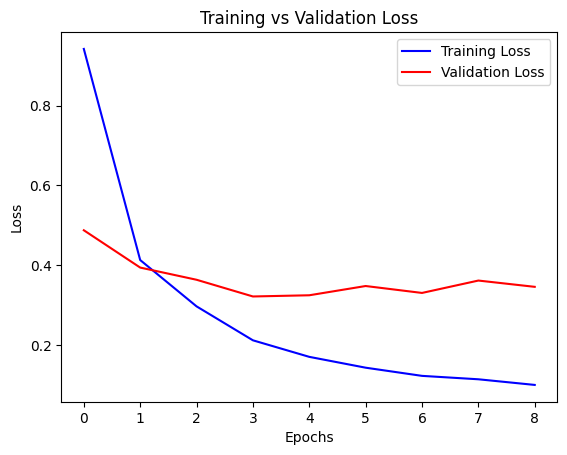

In [31]:
plot_losses(history_1)

### Conclusion: Early Overfitting (after 4 epochs). However, reaches lower validation loss and higher accuracy than a simple LSTM model with same embedding size and number of nodes

## Model 2

### Increase Nodes

In [33]:
# create model
model_2 = Sequential()
model_2.add(Embedding(vocab_size, 8))
model_2.add(Bidirectional(LSTM(8)))
model_2.add(Dense(4, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [34]:
history_2 = model_2.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - acc: 0.4876 - loss: 1.1374 - val_acc: 0.8180 - val_loss: 0.6335
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9043 - loss: 0.4774 - val_acc: 0.9300 - val_loss: 0.2617
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9549 - loss: 0.1844 - val_acc: 0.9290 - val_loss: 0.2605
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9686 - loss: 0.1328 - val_acc: 0.9300 - val_loss: 0.2325
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9724 - loss: 0.1214 - val_acc: 0.9380 - val_loss: 0.2411
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9776 - loss: 0.0898 - val_acc: 0.9210 - val_loss: 0.2835
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9801 - loss: 0.0872 - val_acc: 0.9300 - val_loss: 0.2780
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9851 - loss: 0.0610 - val_acc: 0.9160 - val_loss: 0.3187
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

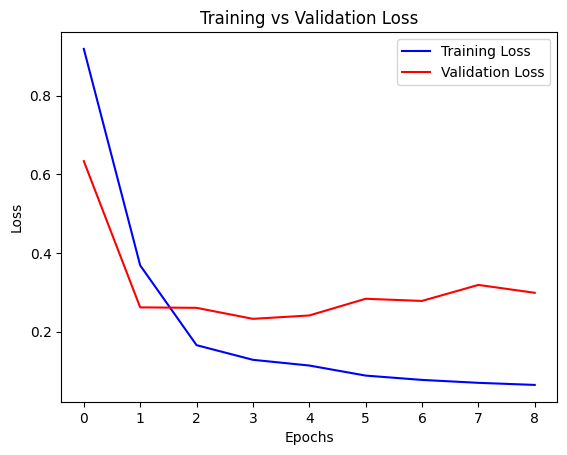

In [35]:
plot_losses(history_2)

### Conclusion: Overfits after 4 epochs. Performs better than best perfroming LSTM model, even with a much smaller embedding size

## Model 3

### Increase Nodes

In [39]:
# create model
model_3 = Sequential()
model_3.add(Embedding(vocab_size, 8))
model_3.add(Bidirectional(LSTM(12)))
model_3.add(Dense(4, activation='sigmoid'))
model_3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [40]:
history_3 = model_3.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - acc: 0.6100 - loss: 0.9618 - val_acc: 0.9000 - val_loss: 0.3927
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9482 - loss: 0.2270 - val_acc: 0.9360 - val_loss: 0.2743
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9646 - loss: 0.1673 - val_acc: 0.9360 - val_loss: 0.2844
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9652 - loss: 0.1537 - val_acc: 0.9370 - val_loss: 0.2929
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9710 - loss: 0.1410 - val_acc: 0.9220 - val_loss: 0.3335
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9776 - loss: 0.1101 - val_acc: 0.9300 - val_loss: 0.2955
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9787 - loss: 0.1015 - val_acc: 0.9240 - val_loss: 0.3693


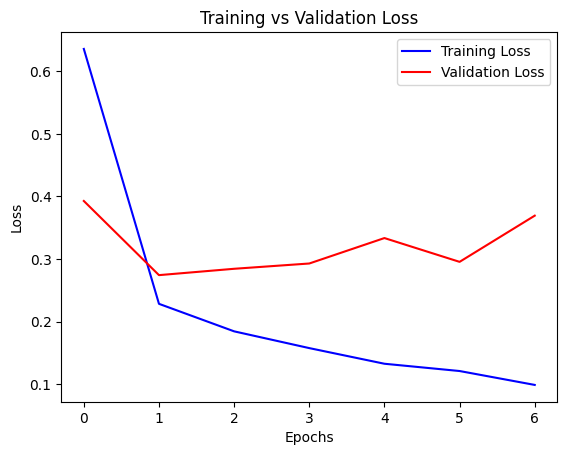

In [41]:
plot_losses(history_3)

### Conclusion: Increasing nodes impairs performance

## Model 4

### Increase Embedding Size

In [42]:
# create model
model_4 = Sequential()
model_4.add(Embedding(vocab_size, 16))
model_4.add(Bidirectional(LSTM(8)))
model_4.add(Dense(4, activation='sigmoid'))
model_4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
history_4 = model_4.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - acc: 0.5372 - loss: 1.1114 - val_acc: 0.9130 - val_loss: 0.3337
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - acc: 0.9411 - loss: 0.2445 - val_acc: 0.9280 - val_loss: 0.2566
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - acc: 0.9620 - loss: 0.1569 - val_acc: 0.9350 - val_loss: 0.2456
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - acc: 0.9701 - loss: 0.1210 - val_acc: 0.9330 - val_loss: 0.2601
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.9774 - loss: 0.0974 - val_acc: 0.9410 - val_loss: 0.2337
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.9798 - loss: 0.0839 - val_acc: 0.9350 - val_loss: 0.2744
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.9843 - loss: 0.0727 - val_acc: 0.9360 - val_loss: 0.2802
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.9873 - loss: 0.0549 - val_acc: 0.9230 - val_loss: 0.3358
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

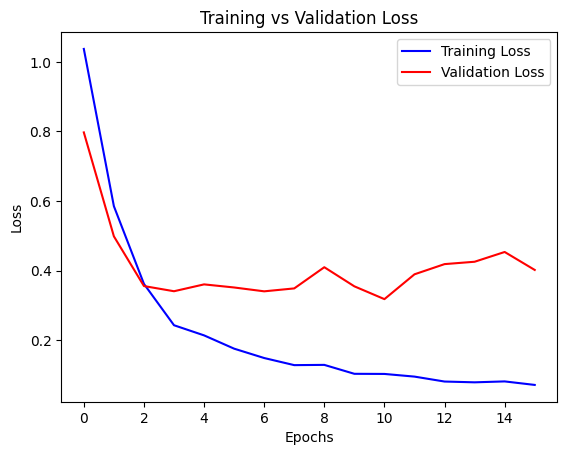

In [36]:
plot_losses(history_4)

### Conclusion: Increasing Embedding Size to 16 increases validation accuracy from 93.4 to 94.1 without impacting the loss

## Model 5

### Increase Embedding Size

In [44]:
# create model
model_5 = Sequential()
model_5.add(Embedding(vocab_size, 24))
model_5.add(Bidirectional(LSTM(8)))
model_5.add(Dense(4, activation='sigmoid'))
model_5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [45]:
history_5 = model_5.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - acc: 0.5674 - loss: 1.0507 - val_acc: 0.9220 - val_loss: 0.2977
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - acc: 0.9464 - loss: 0.2135 - val_acc: 0.9310 - val_loss: 0.2431
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - acc: 0.9635 - loss: 0.1476 - val_acc: 0.9360 - val_loss: 0.2396
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9706 - loss: 0.1123 - val_acc: 0.9360 - val_loss: 0.2589
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - acc: 0.9804 - loss: 0.0762 - val_acc: 0.9430 - val_loss: 0.2196
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - acc: 0.9843 - loss: 0.0635 - val_acc: 0.9350 - val_loss: 0.2466
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - acc: 0.9868 - loss: 0.0555 - val_acc: 0.9360 - val_loss: 0.2702
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - acc: 0.9888 - loss: 0.0434 - val_acc: 0.9280 - val_loss: 0.2982
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

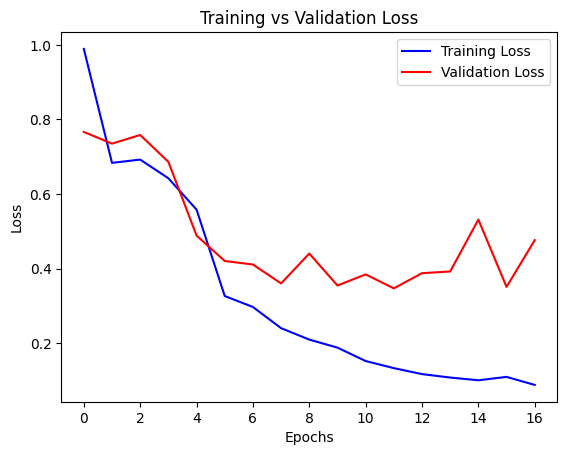

In [39]:
plot_losses(history_5)

### Conclusion: Increasing Embedding Size to 24 lowers loss and increases accuracy

## Model 6

### Increase Embedding Size

In [46]:
model_6 = Sequential()
model_6.add(Embedding(vocab_size, 32))
model_6.add(Bidirectional(LSTM(8)))
model_6.add(Dense(4, activation='sigmoid'))
model_6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [47]:
history_6 = model_6.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - acc: 0.6160 - loss: 0.9861 - val_acc: 0.8840 - val_loss: 0.3888
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9304 - loss: 0.2481 - val_acc: 0.9290 - val_loss: 0.2513
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9619 - loss: 0.1436 - val_acc: 0.9300 - val_loss: 0.2930
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - acc: 0.9720 - loss: 0.1092 - val_acc: 0.9390 - val_loss: 0.2575
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9809 - loss: 0.0774 - val_acc: 0.9390 - val_loss: 0.2649
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9865 - loss: 0.0539 - val_acc: 0.9290 - val_loss: 0.2626
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - acc: 0.9899 - loss: 0.0401 - val_acc: 0.9280 - val_loss: 0.3281


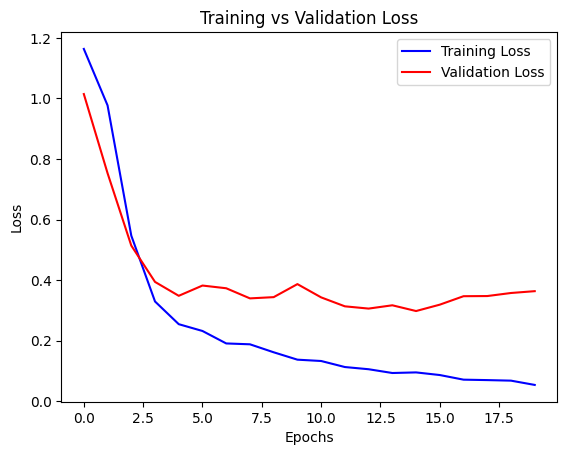

In [45]:
plot_losses(history_6)

### Conclusion: Increasing embedding size from 24 to 32 does not reduce validation loss impairs performance

## Model 7

### Add Recurrent Dropout

In [50]:
# create model
model_7 = Sequential()
model_7.add(Embedding(vocab_size, 24))
model_7.add(Bidirectional(LSTM(8, recurrent_dropout=0.1, dropout=0.1)))
model_7.add(Dense(4, activation='sigmoid'))
model_7.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [51]:
history_7 = model_7.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - acc: 0.5595 - loss: 1.0807 - val_acc: 0.8510 - val_loss: 0.4931
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.8652 - loss: 0.4336 - val_acc: 0.8970 - val_loss: 0.3701
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.9176 - loss: 0.2896 - val_acc: 0.9130 - val_loss: 0.3248
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - acc: 0.9393 - loss: 0.2295 - val_acc: 0.9140 - val_loss: 0.3139
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.9485 - loss: 0.1864 - val_acc: 0.9260 - val_loss: 0.2947
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.9636 - loss: 0.1442 - val_acc: 0.9320 - val_loss: 0.2808
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.9694 - loss: 0.1137 - val_acc: 0.9280 - val_loss: 0.2860
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.9690 - loss: 0.1108 - val_acc: 0.9370 - val_loss: 0.2688
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

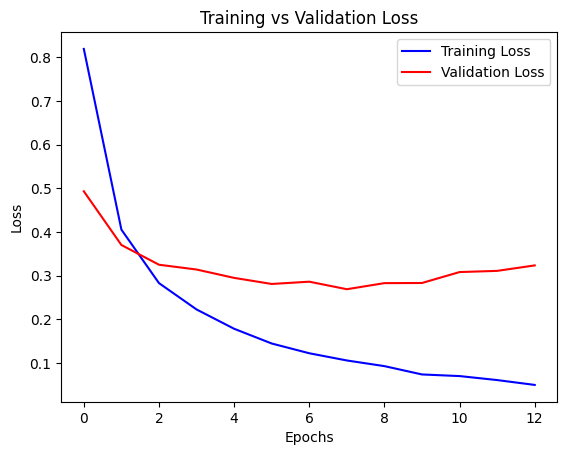

In [52]:
plot_losses(history_7)

### Conclusion: Adding recurrent dropout impairs performance

## Model 9

### Add L2 Regularisation

In [22]:
from keras.regularizers import l2

In [24]:
# create model
model_9 = Sequential()
model_9.add(Embedding(vocab_size, 24))
model_9.add(Bidirectional(LSTM(8, kernel_regularizer=l2(0.001))))
model_9.add(Dense(4, activation='sigmoid'))
model_9.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [25]:
history_9 = model_9.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - acc: 0.5962 - loss: 1.0435 - val_acc: 0.9190 - val_loss: 0.3604
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - acc: 0.9462 - loss: 0.2555 - val_acc: 0.9220 - val_loss: 0.3212
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - acc: 0.9621 - loss: 0.1743 - val_acc: 0.9300 - val_loss: 0.2791
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - acc: 0.9776 - loss: 0.1180 - val_acc: 0.9260 - val_loss: 0.3261
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - acc: 0.9779 - loss: 0.1121 - val_acc: 0.9270 - val_loss: 0.3451
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.9768 - loss: 0.1133 - val_acc: 0.9260 - val_loss: 0.3214
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.9832 - loss: 0.0844 - val_acc: 0.9240 - val_loss: 0.3424
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - acc: 0.9841 - loss: 0.0693 - val_acc: 0.9050 - val_loss: 0.4231


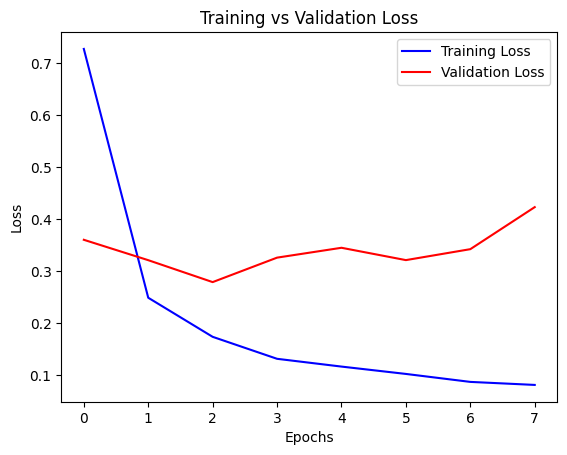

In [26]:
plot_losses(history_9)

### Conclusion: Regularisation, even with a small value (0.001), impairs performance

# Get Metrics on Test Set

In [27]:
from sklearn.metrics import classification_report, accuracy_score

In [58]:
y_pred = model_5.predict(test_x)

# Get Label with highest probability
y_pred = y_pred.argmax(axis=1)  

# Generate classification report
report = classification_report(test_y, y_pred, digits=4)  
accuracy = accuracy_score(test_y, y_pred)  

print(report)
print(f"Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0     0.9516    0.9440    0.9478       250
           1     0.9246    0.9320    0.9283       250
           2     0.9395    0.9320    0.9357       250
           3     0.9524    0.9600    0.9562       250

    accuracy                         0.9420      1000
   macro avg     0.9420    0.9420    0.9420      1000
weighted avg     0.9420    0.9420    0.9420      1000

Accuracy: 0.9420
